## Data Analysis - Daniela


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data1 = pd.read_csv('Mobile_App_Store_Data/appleStore.csv')
data2 = pd.read_csv('Mobile_App_Store_Data/appleStore_description.csv')

# merge data
data = pd.merge(data1, data2, how='outer', on=['id', 'id'])

# clean
data = data.drop('Unnamed: 0', axis=1)
data = data.drop('track_name_y', axis=1)
data = data.drop('size_bytes_y', axis=1)

# show
data.head(3)


,id,track_name_x,size_bytes_x,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...


In [3]:
data.columns

Index(['id', 'track_name_x', 'size_bytes_x', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic',
       'app_desc'],
      dtype='object')

### Is there any correlation between columns? - Q2

In [4]:
correlations = data.drop('id', axis=1).corr().round(decimals=2)


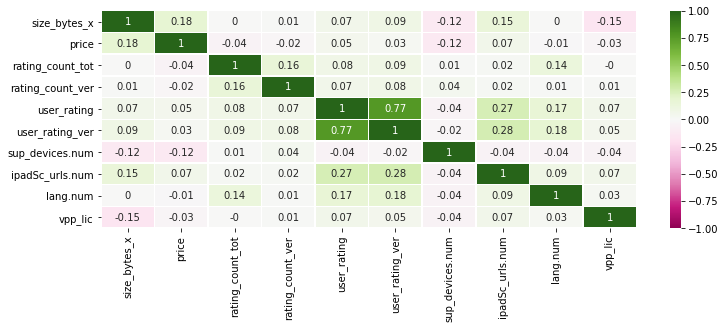

In [5]:
# correlations for all columns
plt.figure(figsize=(12,4))
heatmap = sns.heatmap(correlations, annot=True, linewidths=.5, cmap="PiYG", vmin=-1.0, vmax=1.0)


In [6]:
strong_correlations = correlations[abs(correlations) > 0.17]
strong_correlations = strong_correlations[abs(correlations) != 1]

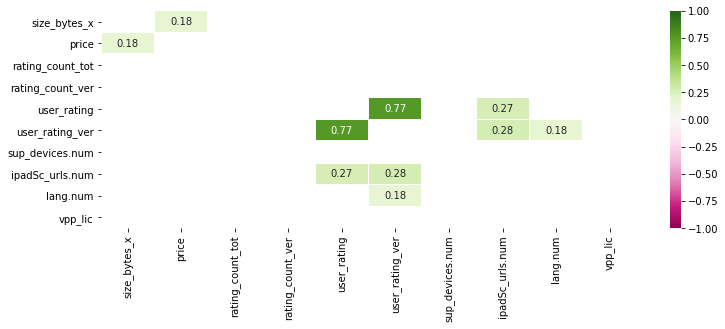

In [7]:
# only stronger correlations (abs value above 0.16)
plt.figure(figsize=(12,4))

heatmap = sns.heatmap(strong_correlations, annot=True, linewidths=.5, cmap="PiYG", vmin=-1.0, vmax=1.0)


From the heat map we can see very strong correlation between user_rating and user_rating_ver.

Mid-range correlation seems between user_rating and ipadSc_urls.num, between user_rating_ver and ipadSc_urls.num.

Slight correlation may be present between size_bytes_x and prize and between lang.num and user_rating_ver.

### A visualization of average user_rating vs average price per category - Q6


In [8]:
import plotly.express as px

In [15]:
# average_rating_category = data.groupby(['prime_genre'])['user_rating', 'price', 'rating_count_tot', 'sup_devices.num'].mean()
# average_rating_category['Category']=average_rating_category['prime_genre']
# average_rating_category = average_rating_category.set_index('prime_genre')



average_rating_category = data.groupby(['prime_genre'])['user_rating', 'price', 'rating_count_tot', 'sup_devices.num'].mean().reset_index()
average_rating_category['Category']=average_rating_category['prime_genre']
average_rating_category = average_rating_category.set_index('prime_genre')

average_rating_category




<ipython-input-15-80bea46c46df>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_rating_category = data.groupby(['prime_genre'])['user_rating', 'price', 'rating_count_tot', 'sup_devices.num'].mean().reset_index()


,user_rating,price,rating_count_tot,sup_devices.num,Category
prime_genre,,,,,
Book,2.477679,1.790536,5125.437500,37.544643,Book
Business,3.745614,5.116316,4788.087719,36.122807,Business
Catalogs,2.100000,0.799000,1732.500000,37.300000,Catalogs
Education,3.376380,4.028234,2239.229581,36.675497,Education
Entertainment,3.246729,0.889701,7533.678505,36.671028,Entertainment
Finance,2.432692,0.421154,11047.653846,36.836538,Finance
Food & Drink,3.182540,1.552381,13938.619048,36.920635,Food & Drink
Games,3.685008,1.432923,13691.996634,38.018384,Games
Health & Fitness,3.700000,1.916444,9913.172222,35.888889,Health & Fitness


In [26]:
# visualization of average user_rating vs average price per category
# The sice of category circle is according to rating_count_tot

fig = px.scatter(average_rating_category.loc[['Medical','Weather','Navigation','Book', 'Social Networking',  'Games', 'Education', 'Shopping','News', 'Music']], x="price", y="user_rating", size="rating_count_tot", color="Category",
           hover_name="Category", log_x=False, trendline='ols', width=600, height=400)

print('Size=rating_count_tot ')
fig.show()

Size=rating_count_tot 


In [27]:
# fig.write_html("images/IMG.html")

In [29]:
# fig.write_image("images/IMG.png")